In [55]:
%load_ext autoreload
%autoreload 2

import os, codecs, string, random
import numpy as np
import pandas as pd

#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt


#The data
corpus_advBeer_root = 'DATA/BeerAdvocate/'
df_adv_breweries = pd.read_csv(corpus_advBeer_root + 'breweries.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [ ]:
#from functions import read_data
#mysmallratings=read_data.fetch_reviews("DATA/RateBeer.tar", max_csv_size = 500000,early_stop = 0)

In [ ]:
df_adv_breweries.head()

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
books = list()

for book_file in os.listdir(corpus_advBeer_root):
    if ".txt" in book_file:
        if not ".gz" in book_file:
            print(book_file)
            with codecs.open(os.path.join(corpus_advBeer_root,book_file), encoding="utf8") as f:
                books.append(f.read())

In [3]:
beers_name = ""
beer_id = ""
brewery_name = ""
brewery_id = ""
user_id = ""
text = []
data = []
with open(corpus_advBeer_root + "reviews.txt", encoding='utf-8') as f:
    for line in f.readlines():
        line = line[:-1]
        #print(line)
            
        if line.startswith("beer_id: "):
            beer_id = line[9:]
            #print('BEER ID:', beers_id)
            continue
            
        if line.startswith("brewery_id: "):
            brewery_id = line[11:]
            #print('Brewery ID:', brewery_id)
            continue
            
        if line.startswith("text: "):
            review = line[6:]
            #print('TEXT:', reviews)
            data.append([beer_id,brewery_id, review])
            continue
            
            
df_rev = pd.DataFrame(data, columns=["beer_id","brewery_id", "review"])
       

In [4]:
df_rev.shape

(2589586, 3)

In [5]:
df_rev_low = df_rev.loc[:10000, :]

In [7]:
df_rev_low.shape

(10001, 3)

In [8]:
# check all brewery id are in the dataset brewery
print(df_rev_low['brewery_id'].astype(int).isin(df_adv_breweries['id']).sum(), df_rev.shape[0])

df_rev_low.head()

10001 2589586


,beer_id,brewery_id,review
0,142544,37262,"From a bottle, pours a piss yellow color with ..."
1,19590,10093,Pours pale copper with a thin head that quickl...
2,19590,10093,"500ml Bottle bought from The Vintage, Antrim....."
3,19590,10093,Serving: 500ml brown bottlePour: Good head wit...
4,19590,10093,"500ml bottlePours with a light, slightly hazy ..."


In [9]:
review = df_adv_breweries.loc[df_adv_breweries['id'].isin(df_rev_low['brewery_id'].astype(int)),['id','location']]
print(review.shape)

(92, 2)


In [18]:
review.head()

,id,location
8,37262,Gabon
9,10093,Northern Ireland
11,297,Northern Ireland
12,40360,Northern Ireland
13,3415,Northern Ireland


In [19]:
df_rev_low.head()

,beer_id,brewery_id,review
0,142544,37262,"From a bottle, pours a piss yellow color with ..."
1,19590,10093,Pours pale copper with a thin head that quickl...
2,19590,10093,"500ml Bottle bought from The Vintage, Antrim....."
3,19590,10093,Serving: 500ml brown bottlePour: Good head wit...
4,19590,10093,"500ml bottlePours with a light, slightly hazy ..."


In [28]:
counter = 0

def my_location4(x, review):
    
    #print(x, type(x))
    
    location =  review.loc[review['id'] == int(x),'location'].values  
    
    return location[0]
    

In [32]:
df_rev_low.loc[:,'location'] = df_rev_low['brewery_id'].apply(my_location4, args= (review,) )

C:\Users\xavie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [33]:
df_rev_low.head()

,beer_id,brewery_id,review,location
0,142544,37262,"From a bottle, pours a piss yellow color with ...",Gabon
1,19590,10093,Pours pale copper with a thin head that quickl...,Northern Ireland
2,19590,10093,"500ml Bottle bought from The Vintage, Antrim.....",Northern Ireland
3,19590,10093,Serving: 500ml brown bottlePour: Good head wit...,Northern Ireland
4,19590,10093,"500ml bottlePours with a light, slightly hazy ...",Northern Ireland


In [162]:
def my_location3(re, df1):
    
    for i in range(review.shape[0]):
        df1.loc[2['brewery_id'] == re.iloc[i,0],'location'] = re.iloc[i,1]
        
        if (i % 10) == 0:
            print('step',i)
        
    return df1
    
    

In [ ]:
df_rev = my_location3(review, df_rev)

step 0
step 10
step 20
step 30
step 40
step 50
step 60
step 70
step 80
step 90
step 100
step 110
step 120
step 130
step 140
step 150
step 160
step 170
step 180
step 190
step 200
step 210
step 220
step 230
step 240
step 250
step 260
step 270
step 280
step 290
step 300
step 310
step 320
step 330
step 340
step 350
step 360
step 370
step 380
step 390
step 400
step 410
step 420
step 430
step 440
step 450
step 460


In [ ]:
def my_location2(x, df_local, df2):
    
    #print(type(df_local), df_local.shape)

    #print(df2['location'].isna().values.any())
    if (df2['location'].isna().values.any()):
        
        location = df_local.loc[df_local['id'] == int(x), 'location'].values

        df2.loc[df2['brewery_id'].astype(int) == int(x), 'location' ] = df2.loc[df2['id']]
    else:
        print('finish')
    
    return df2

In [154]:
count = 0

In [155]:
def my_location(x, df_local, df2):
    count = count +1
    print(count)

    #print(type(df_local), df_local.shape)

    #print(df2['location'].isna().values.any())
    if (df2['location'].isna().values.any()):

        location = df_local.loc[df_local['id'] == int(x), 'location'].values

        df2.loc[df2['brewery_id'].astype(int) == int(x), 'location' ] = location[0]
    else:
        print('finish')

    return df2


In [156]:
df_rev = review['id'].apply(my_location, args= (df_adv_breweries,df_rev,))

UnboundLocalError: local variable 'count' referenced before assignment

In [62]:
location = df_adv_breweries.loc[df_adv_breweries['id'] == 10093, 'location'].values
print(location[0])

Northern Ireland


In [ ]:
def get_location(x, df1,df2):
    #print(value)
    
    location = df1.loc[df1['id']== int(x), 'location'].values
    
    df2.loc[df2['brewery_id'].astype(int) == int(x9 'location' ] = location[0]
    
    return df2

### Sentiment Analyzer

In [103]:
# try a simple example to check the code is okay
example = df_rev_low.review[0]
vs = analyzer.polarity_scores(example)

In [104]:
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

From a bottle, pours a piss yellow color with a fizzy white head.  This is carbonated similar to soda.The nose is basic.. malt, corn, a little floral, some earthy straw.  The flavor is boring, not offensive, just boring.  Tastes a little like corn and grain.  Hard to write a review on something so simple.Its ok, could be way worse. 

Negative sentiment: 0.139
Neutral sentiment: 0.763
Positive sentiment: 0.098
Compound sentiment: -0.4312


In [90]:
import matplotlib.pyplot as plt
ROW = 10000
df_rev_low.shape

(10001, 4)

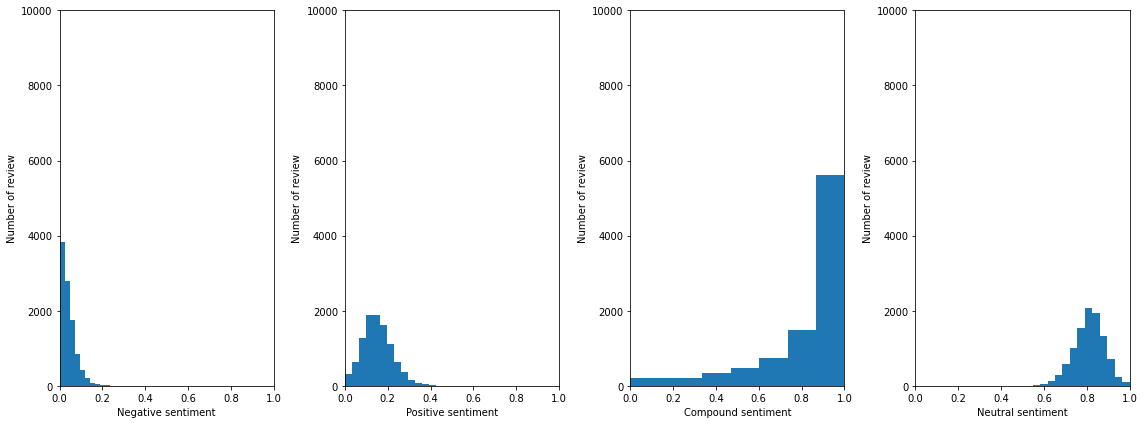

In [111]:
plt.close('all')
fig = plt.figure(figsize=(16,6))

ax1 = plt.subplot(141)
ax2 = plt.subplot(142)
ax3 = plt.subplot(143)
ax4 = plt.subplot(144)

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low.review]
ax1.hist(negative_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment', ylabel = 'Number of review') 

positive_sent = []
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low.review]
ax2.hist(positive_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment', ylabel = 'Number of review') 

total_sent = []
[total_sent.append(analyzer.polarity_scores(sent)['compound']) for sent in df_rev_low.review]
ax3.hist(total_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Compound sentiment', ylabel = 'Number of review') 

neutre_sent = []
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low.review]
ax4.hist(neutre_sent,bins=15)
ax4.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment', ylabel = 'Number of review') 

plt.tight_layout()

In [ ]:
#print('Number of positive sentences:',sum(np.array(sents)>=0.05))
#print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
#print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))

###  Sentiments Analysis with Location

In [94]:
df_rev_low['location'].value_counts()

Scotland            8627
Wales                969
Northern Ireland     404
Gabon                  1
Name: location, dtype: int64

In [95]:
df_rev_low_sco = df_rev_low.loc[df_rev_low['location'] == 'Scotland',:]
df_rev_low_wal = df_rev_low.loc[df_rev_low['location'] == 'Wales',:]
df_rev_low_noir = df_rev_low.loc[df_rev_low['location'] == 'Northern Ireland',:]

[(0.0, 1.0),
 (0.0, 10000.0),
 Text(0.5, 0, 'Negative sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review gabon')]

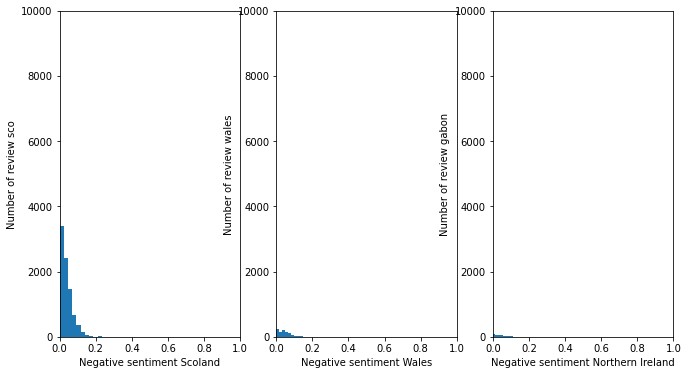

In [99]:
plt.close('all')
fig = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_sco.review]
ax1.hist(negative_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment Scoland', ylabel = 'Number of review sco') 

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_wal.review]
ax2.hist(negative_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment Wales', ylabel = 'Number of review wales') 

negative_sent = []
[negative_sent.append(analyzer.polarity_scores(sent)['neg']) for sent in df_rev_low_noir.review]
ax3.hist(negative_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Negative sentiment Northern Ireland', ylabel = 'Number of review gabon') 




[(0.0, 1.0),
 (0.0, 10000.0),
 Text(0.5, 0, 'Positive sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review Northern Ireland')]

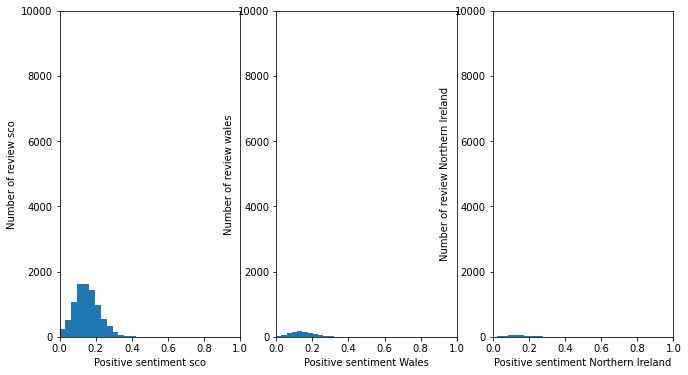

In [101]:
plt.close('all')
fig2 = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

positive_sent = []
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_sco.review]
ax1.hist(positive_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment sco', ylabel = 'Number of review sco') 

positive_sent=[]
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_wal.review]
ax2.hist(positive_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment Wales', ylabel = 'Number of review wales') 

positive_sent=[]
[positive_sent.append(analyzer.polarity_scores(sent)['pos']) for sent in df_rev_low_noir.review]
ax3.hist(positive_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Positive sentiment Northern Ireland', ylabel = 'Number of review Northern Ireland') 

[(0.0, 1.0),
 (0.0, 10000.0),
 Text(0.5, 0, 'Neutral sentiment Northern Ireland'),
 Text(0, 0.5, 'Number of review Northern Ireland')]

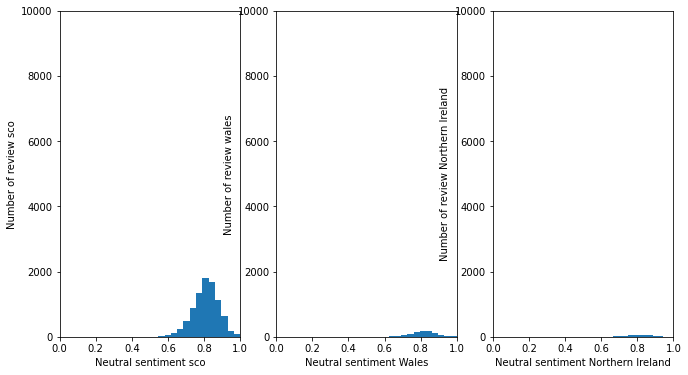

In [105]:
plt.close('all')
fig2 = plt.figure(figsize=(11,6))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

neutre_sent = []
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_sco.review]
ax1.hist(neutre_sent,bins=15)
ax1.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment sco', ylabel = 'Number of review sco') 

neutre_sent=[]
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_wal.review]
ax2.hist(neutre_sent,bins=15)
ax2.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment Wales', ylabel = 'Number of review wales') 

neutre_sent=[]
[neutre_sent.append(analyzer.polarity_scores(sent)['neu']) for sent in df_rev_low_noir.review]
ax3.hist(neutre_sent,bins=15)
ax3.set(xlim = [0,1], ylim = [0,ROW] , xlabel='Neutral sentiment Northern Ireland', ylabel = 'Number of review Northern Ireland') 